# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsual.h5')

elec=deps.buildings[1].elec # Todos los medidores

labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fan', 'Freezer', 'Television','Vacuum Cleaner', 'Boiler']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity               power    current        pf     voltage  \
type                         apparent                                    
2022-02-02 10:16:10+01:00  191.709427   0.096260  0.644985  243.948563   
2022-02-02 10:16:20+01:00  171.220123   0.093746  0.647549  243.924240   
2022-02-02 10:16:30+01:00  159.038940   0.091261  0.655690  243.870300   
2022-02-02 10:16:40+01:00         inf   2.688525  0.715962  242.845306   
2022-02-02 10:16:50+01:00         inf  10.662050  0.987122  240.016556   
...                               ...        ...       ...         ...   
2022-02-02 12:57:20+01:00   80.440697   0.082666  0.630069  242.294617   
2022-02-02 12:57:30+01:00   80.267578   0.081674  0.637428  242.379272   
2022-02-02 12:57:40+01:00   75.361038   0.079819  0.644254  242.135498   
2022-02-02 12:57:50+01:00   77.140190   0.080678  0.640568  242.268982   
2022-02-02 12:58:00+01:00   72.016953   0.079864  0.637537  242.360001   

physical_quantity          frequency      power               
type                                   reactive       active  
2022-02-02 10:16:10+01:00  50.009941  -5.976255    15.145640  
2022-02-02 10:16:20+01:00  50.003109  -6.076593    14.803304  
2022-02-02 10:16:30+01:00  49.995876  -6.076886    14.591208  
2022-02-02 10:16:40+01:00  49.988461  27.890411   589.711853  
2022-02-02 10:16:50+01:00  49.979092  62.584034  2526.152100  
...                              ...        ...          ...  
2022-02-02 12:57:20+01:00  50.023113  -5.992646    12.617174  
2022-02-02 12:57:30+01:00  50.022034  -6.142257    12.614280  
2022-02-02 12:57:40+01:00  50.007778  -5.988403    12.451256  
2022-02-02 12:57:50+01:00  50.015041  -6.070859    12.519396  
2022-02-02 12:58:00+01:00  50.022499  -5.956950    12.339650  

[972 rows x 7 columns]

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity               power    current        pf     voltage  \
type                         apparent                                    
2022-02-02 10:16:10+01:00  197.418655   0.096481  0.647985  243.951508   
2022-02-02 10:16:20+01:00  178.151337   0.095011  0.645128  243.947998   
2022-02-02 10:16:30+01:00  176.598251   0.092960  0.656962  243.916595   
2022-02-02 10:16:40+01:00  155.541763   0.090913  0.656028  243.891998   
2022-02-02 10:16:50+01:00         inf  10.700621  0.998165  239.979401   
...                               ...        ...       ...         ...   
2022-02-02 12:57:20+01:00   70.458130   0.081504  0.621199  242.236206   
2022-02-02 12:57:30+01:00   77.369026   0.082857  0.623726  242.464600   
2022-02-02 12:57:40+01:00   80.512634   0.079952  0.654005  242.054001   
2022-02-02 12:57:50+01:00   79.503090   0.081043  0.642676  242.027405   
2022-02-02 12:58:00+01:00   72.016953   0.079864  0.637537  242.360001   

physical_quantity          frequency      power               
type                                   reactive       active  
2022-02-02 10:16:10+01:00  50.010803  -6.157390    15.246300  
2022-02-02 10:16:20+01:00  50.007900  -6.066718    14.948080  
2022-02-02 10:16:30+01:00  49.998501  -6.137362    14.898340  
2022-02-02 10:16:40+01:00  49.992020  -6.200194    14.545600  
2022-02-02 10:16:50+01:00  49.982620  63.509418  2563.216064  
...                              ...        ...          ...  
2022-02-02 12:57:20+01:00  50.021301  -5.704082    12.263480  
2022-02-02 12:57:30+01:00  50.024361  -6.230612    12.524580  
2022-02-02 12:57:40+01:00  50.014759  -5.972212    12.654700  
2022-02-02 12:57:50+01:00  50.006641  -6.086078    12.607480  
2022-02-02 12:58:00+01:00  50.022499  -5.956950    12.339650  

[972 rows x 7 columns]

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

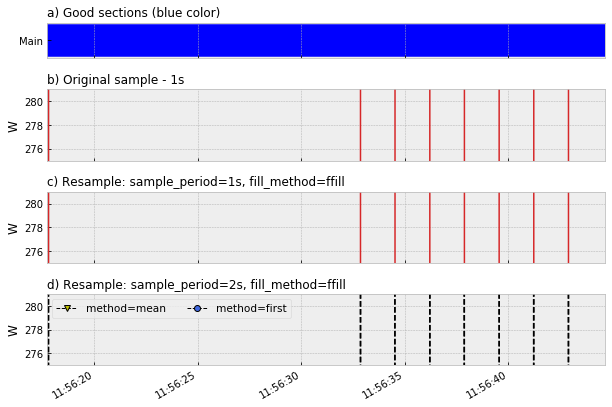

In [17]:
rcParams['figure.figsize'] = (10, 7)

#definición de fechas
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'

#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
ax1.annotate("|10:16:00 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.annotate("|10:16:00 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [18]:
Devices=elec.select(instance=[2,3,4,5,6]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [19]:
Devices = elec.select(instance=[2,3,4,5,6])
Devices.select_top_k(k=5)

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

MeterGroup(meters=
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [20]:
train = DataSet('dsual.h5')

#train.set_window(start="2021-11-11 17:39:00", end="2021-11-11 17:40:00")
train.set_window(start="2022-02-02 10:16:00", end="2022-02-02 10:58:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 10:58:00+01:00', empty=False)

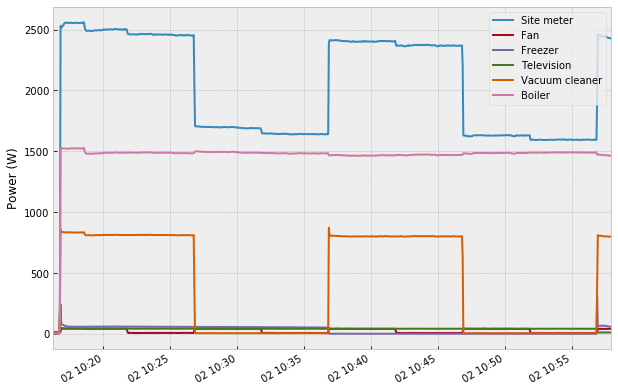

In [21]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [22]:
 #Validación 

valid = DataSet('dsual.h5')

train.set_window(start="2022-02-02 10:58:00", end="2022-02-02 12:00:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

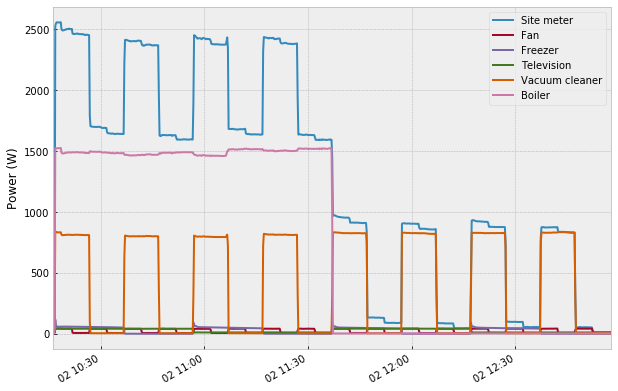

In [23]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [24]:
test = DataSet('dsual.h5') #Pruebas

test.set_window(start="2022-02-02 10:00:00", end="2022-02-02 13:00:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

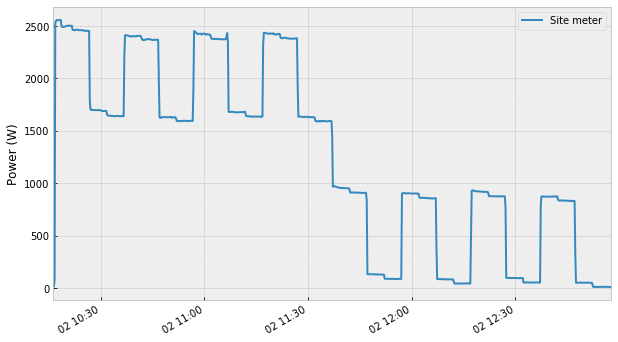

In [16]:
test_elec.mains().plot()